In [1]:
import torch as t
from torch.utils import data

In [2]:
import os
from PIL import Image
import numpy as np
class DogCat(data.Dataset):
    def __init__(self,root):
        imgs=os.listdir(root)
        self.imgs=[os.path.join(root,img) for img in imgs]
    def __getitem__(self,index):
        img_path=self.imgs[index]
        label=1 if 'dog' in img_path.split('/')[-1] else 0
        pil_img=Image.open(img_path)
        array=np.asarray(pil_img)
        data=t.from_numpy(array)
        return data,label
    def __len__(self):
        return len(self.imgs)

In [3]:
dataset=DogCat('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat')
img,label=dataset[0]
for img,label in dataset:
    print(img.size(),img.float().mean(),label)
    

torch.Size([500, 497, 3]) tensor(106.4915) 0
torch.Size([377, 499, 3]) tensor(151.7174) 1
torch.Size([375, 499, 3]) tensor(150.5079) 1
torch.Size([236, 289, 3]) tensor(130.3004) 0
torch.Size([375, 499, 3]) tensor(116.8139) 1
torch.Size([499, 379, 3]) tensor(171.8085) 0
torch.Size([400, 300, 3]) tensor(128.1550) 1
torch.Size([374, 499, 3]) tensor(115.5177) 0


In [4]:
img.shape


torch.Size([374, 499, 3])

In [5]:
import os
from PIL import Image
import numpy as np
from torchvision import transforms as T
transforms=T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5])
])
class DogCat(data.Dataset):
    def __init__(self,root,transforms=None):
        imgs=os.listdir(root)
        self.imgs=[os.path.join(root,img) for img in imgs]
        self.transforms=transforms
    def __getitem__(self,index):
        img_path=self.imgs[index]
        label=0 if 'dog' in img_path.split('/')[-1] else 1
        data=Image.open(img_path)
        if self.transforms:
            data=self.transforms(data)
        return data,label
    def __len__(self):
        return len(self.imgs)
dataset=DogCat('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat',transforms=transforms)
img,label=dataset[0]
for img,label in dataset:
    print(img.size(),label)

torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 1


In [6]:
%help T.CenterCrop

UsageError: Line magic function `%help` not found.


In [7]:
from torchvision.datasets import ImageFolder
dataset=ImageFolder('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_2')

In [8]:
dataset.class_to_idx


{'cat': 0, 'dog': 1}

In [9]:
dataset.imgs

[('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_2/cat/cat.12484.jpg', 0),
 ('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_2/cat/cat.12485.jpg', 0),
 ('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_2/cat/cat.12486.jpg', 0),
 ('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_2/cat/cat.12487.jpg', 0),
 ('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_2/dog/dog.12496.jpg', 1),
 ('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_2/dog/dog.12497.jpg', 1),
 ('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_2/dog/dog.12498.jpg', 1),
 ('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_2/dog/dog.12499.jpg', 1)]

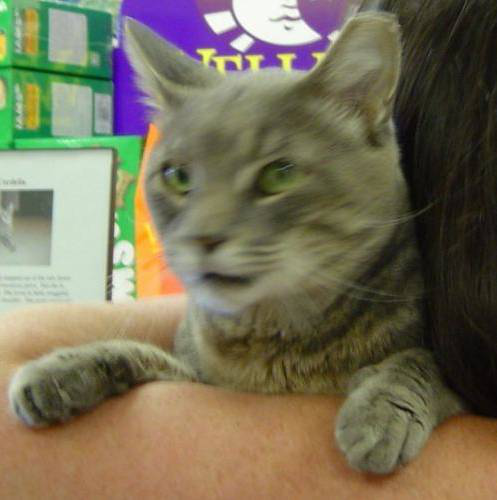

In [10]:
dataset[0][0]

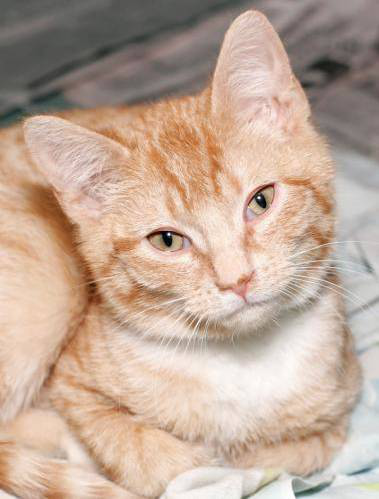

In [11]:
dataset[1][0]

In [12]:
normalize=T.Normalize(mean=[0.4,0.4,0.4],std=[0.2,0.2,0.2])
transform=T.Compose([
    T.RandomResizedCrop(224),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    normalize,
])

In [13]:
dataset=ImageFolder('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_2',transform=transform)

In [14]:
dataset[0][0].size()


torch.Size([3, 224, 224])

In [15]:
to_img=T.ToPILImage()

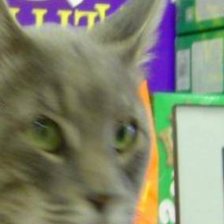

In [16]:
to_img(dataset[0][0]*0.2+0.4)

In [17]:
from torch.utils.data import DataLoader
dataloader=DataLoader(dataset,batch_size=3,shuffle=True,num_workers=0,drop_last=False)
dataiter=iter(dataloader)
imgs,labels=next(dataiter)
imgs.size()

torch.Size([3, 3, 224, 224])

batch_size,channel,height,weight

In [18]:
class NewDogCat(DogCat):
    def __getitem__(self,index):
        try:
            return super(NewDogCat,self).__getitem__(index)
        except:
            return None,None
from torch.utils.data.dataloader import default_collate
import ipdb
# ipdb.set_trace()
def my_collate_fn(batch):
    batch=list(filter(lambda x:x[0] is not None,batch))
    if len(batch)==0: return t.Tensor()
    return default_collate(batch)
dataset=NewDogCat('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat_wrong/',transforms=transform)
    

In [19]:
dataset[2]

(tensor([[[-1.1961, -1.2157, -1.2353,  ...,  2.7255,  2.7255,  2.7255],
          [-1.1176, -1.1765, -1.2157,  ...,  2.7255,  2.7255,  2.7255],
          [-1.0588, -1.1373, -1.1961,  ...,  2.7255,  2.7255,  2.7255],
          ...,
          [ 1.9608,  1.9804,  2.0000,  ...,  2.6275,  2.6275,  2.6275],
          [ 1.9804,  2.0000,  2.0196,  ...,  2.6275,  2.6275,  2.6275],
          [ 1.9804,  2.0000,  2.0000,  ...,  2.6078,  2.6078,  2.6078]],
 
         [[-1.1765, -1.1961, -1.1765,  ...,  2.7647,  2.7647,  2.7647],
          [-1.0980, -1.1569, -1.1961,  ...,  2.7647,  2.7647,  2.7647],
          [-1.0392, -1.1176, -1.1961,  ...,  2.7647,  2.7647,  2.7647],
          ...,
          [ 1.5882,  1.6078,  1.6275,  ...,  2.5490,  2.5490,  2.5490],
          [ 1.6078,  1.6275,  1.6471,  ...,  2.5490,  2.5490,  2.5490],
          [ 1.6078,  1.6275,  1.6275,  ...,  2.5294,  2.5294,  2.5294]],
 
         [[-1.0980, -1.0980, -1.0784,  ...,  2.5098,  2.5098,  2.5098],
          [-1.0196, -1.0588,

In [21]:
dataloader=DataLoader(dataset,2,collate_fn=my_collate_fn,num_workers=1,shuffle=True)
for batch_datas,batch_labels in dataloader:
    print(batch_datas.size(),batch_labels.size())

torch.Size([2, 3, 224, 224]) torch.Size([2])
torch.Size([2, 3, 224, 224]) torch.Size([2])
torch.Size([2, 3, 224, 224]) torch.Size([2])
torch.Size([1, 3, 224, 224]) torch.Size([1])
torch.Size([1, 3, 224, 224]) torch.Size([1])


In [25]:
dataset=DogCat('/home/wcj/pytorch-book/chapter5-常用工具/data/dogcat/',transforms=transform)
weigths=[2 if label==1 else 1 for data,label in dataset]
weigths

[2, 1, 1, 2, 1, 2, 1, 2]

In [28]:
from torch.utils.data.sampler import WeightedRandomSampler
sampler=WeightedRandomSampler(weigths,num_samples=9,replacement=True)
dataloader=DataLoader(dataset,batch_size=3,sampler=sampler)
for datas,labels in dataloader:
    print(labels.tolist())

[0, 1, 1]
[1, 0, 1]
[1, 0, 0]


In [30]:
sampler=WeightedRandomSampler(weigths,8,replacement=False)
dataloader=DataLoader(dataset,batch_size=4,sampler=sampler)
for datas,labels in dataloader:
    print(labels.tolist())

[1, 1, 0, 0]
[1, 0, 1, 0]


In [31]:
from torchvision import models
from torch import nn
resnet34=models.squeezenet1_1(pretrained=True,num_classes=1000)
resnet34.fc=nn.Linear(512,10)
from torchvision import datasets
dataset=datasets.MNIST('data/',download=True,train=False,transform=transform)

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)
Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /home/wcj/.cache/torch/checkpoints/squeezenet1_1-f364aa15.pth
100%|██████████| 4.74M/4.74M [00:02<00:00, 2.28MB/s]


Processing...
Done!


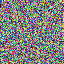

In [32]:
from torchvision import transforms
to_pil=transforms.ToPILImage()
to_pil(t.randn(3,64,64))

In [33]:
len(dataset)

10000

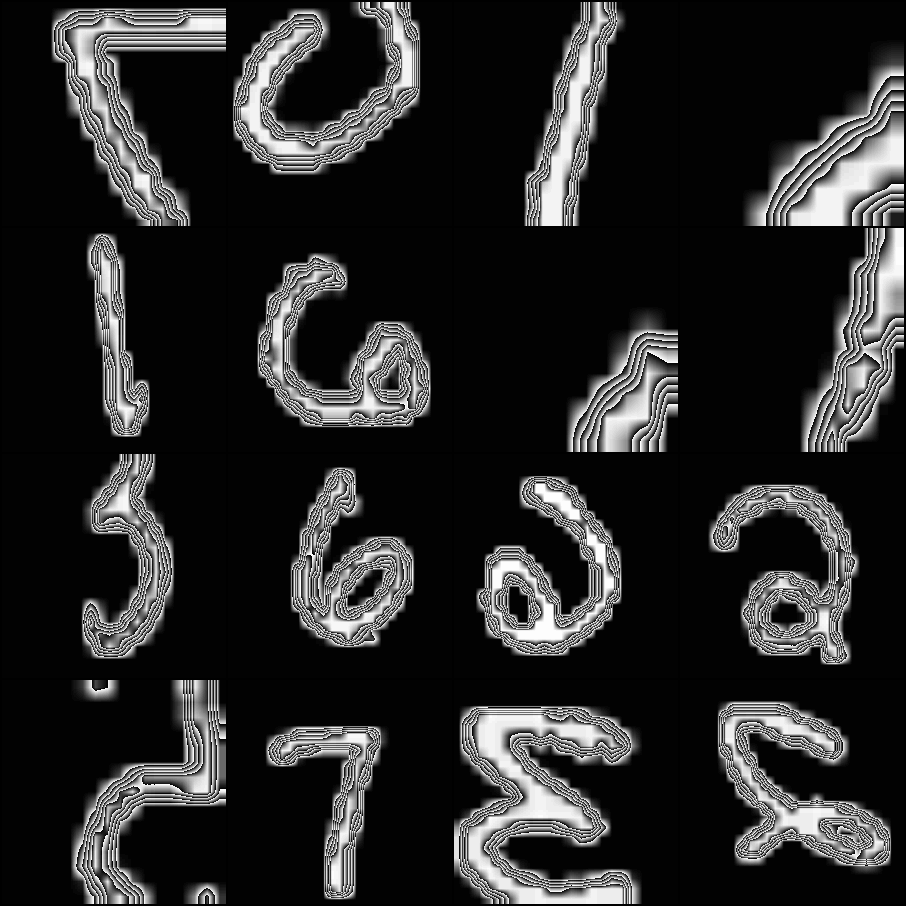

In [39]:
dataloader=DataLoader(dataset,shuffle=True,batch_size=16)
from torchvision.utils import make_grid,save_image
dataiter=iter(dataloader)
img=make_grid(next(dataiter)[0],4)
to_img(img)


In [41]:
save_image(img,'a.png')

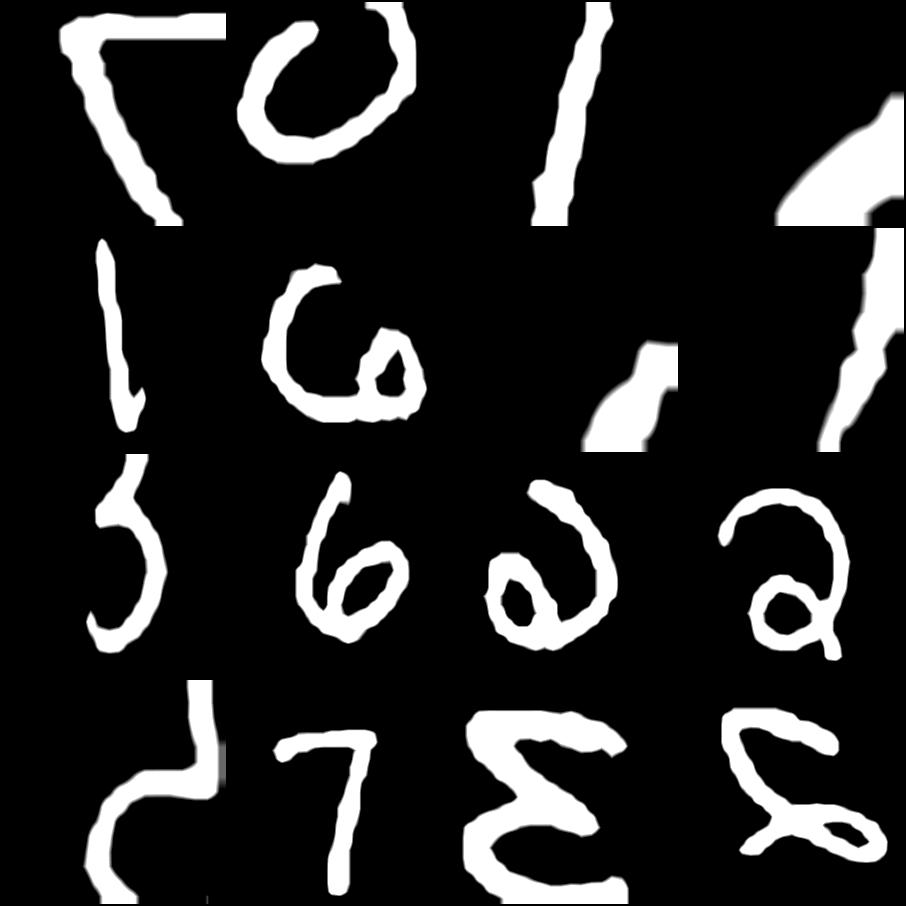

In [42]:
Image.open('a.png')

In [44]:
import torch as t
import visdom
vis=visdom.Visdom(env=u'test1',use_incoming_socket=False)
x=t.arange(1,30,0.01)
y=t.sin(x)
vis.line(X=x,Y=y,win='six',opts={'title':'y=sin(x)'})


Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


'six'

In [45]:
for ii in range(0,10):
    x=t.Tensor([ii])
    y=x
    vis.line(X=x,Y=y,win='polynomial',update='append' if ii>0 else None)
x=t.arange(0,9,0.1)
y=(x**2)/9
vis.line(X=x,Y=y,win='polynomial',name='this is a new Trace',update='new')

'polynomial'

In [50]:
vis.image(t.randn(64,64).numpy())
vis.image(t.randn(3,64,64).numpy(),win='random2')
vis.images(t.randn(36,3,64,64).numpy(),nrow=6,win='random3',opts={'title':'random_imgs'})

'random3'

In [51]:
vis.text(u'''<h1>hello visdom</h1><br>visdom''',win='visdom',opts={'title':u'visdom简介'})

'visdom'

In [4]:
import torch as t
inwav=t.randn(1,1,128)
inwav


tensor([[[ 1.7756e+00, -1.9140e+00, -8.2989e-02, -1.2374e+00,  1.0115e+00,
           1.0569e+00,  1.2519e+00,  1.2300e+00,  8.0339e-01,  1.5702e+00,
           1.2103e+00, -2.1140e+00, -2.2045e+00, -1.5191e+00, -1.7249e+00,
           1.3843e+00, -8.8091e-01,  1.7638e+00,  1.6864e-01,  1.7350e-01,
          -7.9444e-02, -1.5542e+00, -8.2611e-01,  2.2156e-01, -1.0055e+00,
           8.1687e-01, -1.2277e+00,  1.0689e-01, -1.4505e+00,  4.0554e-01,
           6.0934e-01, -6.5805e-01, -4.5736e-01, -7.8486e-01,  1.1744e-01,
           3.9038e-01,  3.5444e-01, -6.4138e-01, -1.4153e-02,  7.1221e-01,
           5.9855e-03, -7.7124e-02, -1.0267e+00, -9.4124e-01, -9.2645e-01,
          -2.3759e+00, -6.1791e-01, -1.1548e+00,  6.9882e-01, -6.8517e-01,
          -1.7779e+00, -4.0381e-01, -1.0952e+00,  1.9022e+00,  9.1541e-02,
           9.9925e-01,  4.0076e-01,  1.2536e+00, -1.8412e+00, -2.8186e-01,
           3.7679e-01,  7.5059e-02, -9.1105e-02, -6.4362e-02,  1.2728e+00,
           8.8454e-02, -2

In [5]:
inwav.shape

torch.Size([1, 1, 128])

In [8]:
inwav.shape[0]

1

In [10]:
inwav[0,0,0:10]

tensor([ 1.7756, -1.9140, -0.0830, -1.2374,  1.0115,  1.0569,  1.2519,  1.2300,
         0.8034,  1.5702])

In [11]:
idx=t.zeros(1)

In [12]:
idx

tensor([0.])

In [15]:
import numpy as np
idy=np.zeros((1,1,1,128))

In [16]:
idy

array([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]]]])

In [22]:
idy.shape[0]

1

UsageError: Line magic function `%?` not found.


In [26]:
conda list


# packages in environment at /home/wcj/anaconda2/envs/pytorch:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_py-xgboost-mutex         2.0                       cpu_0  
_pytorch_select           0.2                       gpu_0  
absl-py                   0.8.1                    py37_0  
asn1crypto                1.3.0                    py37_0  
astor                     0.8.1                    pypi_0    pypi
attrs                     19.3.0                     py_0  
audioread                 2.1.6                    py37_0    conda-forge
backcall                  0.1.0                    py37_0  
beautifulsoup4            4.8.1                    py37_0  
blas                      1.0                         mkl  
bleach                    3.1.0                    py37_0  
bzip2                     1.0.8                h7b6447c_0  
c-ares                    1.15.0            h7b6447c_1001  
ca-certif


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip list

Package              Version            
-------------------- -------------------
absl-py              0.8.1              
asn1crypto           1.3.0              
astor                0.8.1              
attrs                19.3.0             
audioread            2.1.6              
backcall             0.1.0              
beautifulsoup4       4.8.1              
bleach               3.1.0              
certifi              2019.11.28         
cffi                 1.13.2             
chardet              3.0.4              
cryptography         2.8                
cssselect            1.1.0              
cycler               0.10.0             
decorator            4.4.1              
defusedxml           0.6.0              
entrypoints          0.3                
et-xmlfile           1.0.1              
fire                 0.2.1              
gast                 0.3.2              
google-pasta         0.1.8              
grpcio               1.16.1             
h5py            

In [1]:
import torch as t


In [2]:
tensor=t.Tensor(3,4)


In [3]:
tensor


tensor([[-4.3180e-09,  4.5642e-41, -4.3180e-09,  4.5642e-41],
        [ 1.8795e-08,  4.5642e-41,  1.8800e-08,  4.5642e-41],
        [ 1.8798e-08,  4.5642e-41,  1.8797e-08,  4.5642e-41]])

In [4]:
tensor.cuda(0)

tensor([[-4.3180e-09,  4.5642e-41, -4.3180e-09,  4.5642e-41],
        [ 1.8795e-08,  4.5642e-41,  1.8800e-08,  4.5642e-41],
        [ 1.8798e-08,  4.5642e-41,  1.8797e-08,  4.5642e-41]], device='cuda:0')

In [6]:
tensor.is_cuda

False

In [7]:
tensor=tensor.cuda()

In [8]:
tensor.is_cuda

True

In [9]:
from torch import nn


In [10]:
module=nn.Linear(3,4)

In [11]:
module.cuda(device=1)

Linear(in_features=3, out_features=4, bias=True)

In [12]:
module.weight

Parameter containing:
tensor([[ 0.2208,  0.2799,  0.0310],
        [-0.1862, -0.1643,  0.2437],
        [-0.3117, -0.0535,  0.2336],
        [ 0.1483, -0.3578, -0.0380]], device='cuda:1', requires_grad=True)

In [16]:
module.bias


Parameter containing:
tensor([ 0.4795,  0.5143, -0.2205,  0.2392], device='cuda:1',
       requires_grad=True)

In [17]:
module.bias.shape

torch.Size([4])

In [133]:
ceriterion=t.nn.CrossEntropyLoss(weight=t.Tensor(1,4))

In [142]:
input=t.randn(1,4,4).cuda()
input.shape

torch.Size([1, 4, 4])

In [135]:
target=t.Tensor([[1,0,0,1]]).long().cuda()
target.shape

torch.Size([1, 4])

In [136]:
# loss=ceriterion(input,target)
ceriterion.cuda()

CrossEntropyLoss()

In [138]:
loss=ceriterion(input,target)

In [139]:
loss

tensor(1.8313, device='cuda:0')

In [141]:
loss

tensor(1.8313, device='cuda:0')

In [143]:
ceriterion._buffers

OrderedDict([('weight',
              tensor([[6.7333e+22, 1.7591e+22, 1.7184e+25, 4.3222e+27]], device='cuda:0'))])

In [145]:
x=t.cuda.FloatTensor(2,3)
y=t.FloatTensor(2,3).cuda()
with t.cuda.device(1):
    a=t.cuda.FloatTensor(2,3)
    b=t.FloatTensor(2,3).cuda()
    print(a.get_device()==b.get_device()==1)
    c=a+b
    print(c.get_device()==1)
    z=x+y
    print(z.get_device()==0)
    d=t.randn(2,3).cuda(0)
    print(d.get_device()==2)
    

True
True
True
False


In [147]:
t.set_default_tensor_type('torch.cuda.FloatTensor')
a=t.ones(2,3)
a.is_cuda

True

In [149]:
a=t.Tensor(3,4)
if t.cuda.is_available():
    a=a.cuda(1)
    t.save(a,'a.pth')
    b=t.load('a.pth')
    c=t.load('a.pth',map_location=lambda storage,loc:storage )
    d=t.load('a.pth',map_location={'cuda:1':'cuda:0'})

In [150]:
t.set_default_tensor_type('torch.FloatTensor')
from torchvision.models import SqueezeNet
model=SqueezeNet()
model.state_dict().keys()

/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/home/wcj/anaconda2/envs/pytorch/lib/python3.7/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


odict_keys(['features.0.weight', 'features.0.bias', 'features.3.squeeze.weight', 'features.3.squeeze.bias', 'features.3.expand1x1.weight', 'features.3.expand1x1.bias', 'features.3.expand3x3.weight', 'features.3.expand3x3.bias', 'features.4.squeeze.weight', 'features.4.squeeze.bias', 'features.4.expand1x1.weight', 'features.4.expand1x1.bias', 'features.4.expand3x3.weight', 'features.4.expand3x3.bias', 'features.5.squeeze.weight', 'features.5.squeeze.bias', 'features.5.expand1x1.weight', 'features.5.expand1x1.bias', 'features.5.expand3x3.weight', 'features.5.expand3x3.bias', 'features.7.squeeze.weight', 'features.7.squeeze.bias', 'features.7.expand1x1.weight', 'features.7.expand1x1.bias', 'features.7.expand3x3.weight', 'features.7.expand3x3.bias', 'features.8.squeeze.weight', 'features.8.squeeze.bias', 'features.8.expand1x1.weight', 'features.8.expand1x1.bias', 'features.8.expand3x3.weight', 'features.8.expand3x3.bias', 'features.9.squeeze.weight', 'features.9.squeeze.bias', 'features.9.

In [151]:
t.save(model.state_dict(),'squeezenet.pth')
model.load_state_dict(t.load('squeezenet.pth'))


<All keys matched successfully>

In [152]:
optimizer=t.optim.Adam(model.parameters(),lr=0.01)


In [153]:
t.save(optimizer.state_dict(),'optimizer.pth')
optimizer.load_state_dict(t.load('optimizer.pth'))


In [154]:
all_data=dict(optimizer=optimizer.state_dict(),model=model.state_dict(),info=u'模型和优化器的所有参数')
t.save(all_data,'all.pth')


In [155]:
all_data=t.load('all.pth')
all_data.keys()

dict_keys(['optimizer', 'model', 'info'])